In [2]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
from pathlib import Path
import re
import sys
import yaml
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename, logger_func
from ieee_train import eval_train, eval_check_feature
from kaggle_utils import reduce_mem_usage, move_feature
logger = logger_func()

2019-09-29 22:06:42,400 func.utils 347 [INFO]    [logger_func] start 


In [4]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMN_GROUP = 'DT-M'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET, COLUMN_GROUP, 'is_train', 'date']

def filter_feature(path):
    if path.count(''):
        return True
    else:
        return False

paths_train = glob('../submit/re_sub/*_train.gz')
paths_test  = glob('../submit/re_sub/*_test.gz')
paths_train += glob('../submit/add_feature/*_train.gz')
paths_test  += glob('../submit/add_feature/*_test.gz')
print(len(paths_train))

paths_train_feature = []
paths_test_feature  = []

# df_train = reduce_mem_usage( parallel_load_data(paths_train) )
# df_test  = reduce_mem_usage( parallel_load_data(paths_test) )
df_train = parallel_load_data(paths_train)
df_test  = parallel_load_data(paths_test)

SystemExit: 

In [ ]:
data = pd.concat([df_train, df_test], axis=0)
startdate = datetime.datetime(2017,12,1)
data['datetime'] = data['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
data['year'] = data['datetime'].map(lambda x: x.year)
data['month'] = data['datetime'].map(lambda x: x.month)
data['month'] = data['month'].map(lambda x: 5 if x==6 else x)

data['DT-M'] = data[['year', 'month']].apply(lambda x: str(x[0]) + '-' + str(x[1]), axis=1)

  * Diff Features: 1


2019-09-28 00:15:46,894 func.utils 108 [INFO]    [<module>] * EXP: dataset new_set (590540, 216) lr 0.1  
INFO:func.utils:* EXP: dataset new_set (590540, 216) lr 0.1 


Training until validation scores don't improve for 50 rounds.
[200]	valid_0's auc: 0.915044
Early stopping, best iteration is:
[195]	valid_0's auc: 0.915415


2019-09-28 00:16:48,117 func.utils 140 [INFO]    [ieee_cv]   * Fold0 2017-12: 0.9154149357153034 | Bear's...PB:0.9673884515214962 PV:0.9613368288840786 All:0.9632236706645823 
INFO:func.utils:  * Fold0 2017-12: 0.9154149357153034 | Bear's...PB:0.9673884515214962 PV:0.9613368288840786 All:0.9632236706645823


[  * Fold0 Validation-DT-M 2017-12: 134339] done in 55 s
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[93]	valid_0's auc: 0.945319


2019-09-28 00:17:09,367 func.utils 140 [INFO]    [ieee_cv]   * Fold1 2018-3: 0.9453194460342992 | Bear's...PB:0.9569541811306683 PV:0.9577319325401977 All:0.9577596515690193 
INFO:func.utils:  * Fold1 2018-3: 0.9453194460342992 | Bear's...PB:0.9569541811306683 PV:0.9577319325401977 All:0.9577596515690193


[  * Fold1 Validation-DT-M 2018-3: 101968] done in 20 s
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[127]	valid_0's auc: 0.951339


2019-09-28 00:17:37,131 func.utils 140 [INFO]    [ieee_cv]   * Fold2 2018-1: 0.9513387842713585 | Bear's...PB:0.961115538227124 PV:0.9575670370383366 All:0.958997556717618 
INFO:func.utils:  * Fold2 2018-1: 0.9513387842713585 | Bear's...PB:0.961115538227124 PV:0.9575670370383366 All:0.958997556717618


[  * Fold2 Validation-DT-M 2018-1: 92510] done in 26 s
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[120]	valid_0's auc: 0.943886


2019-09-28 00:18:01,052 func.utils 140 [INFO]    [ieee_cv]   * Fold3 2018-5: 0.9438859828161691 | Bear's...PB:0.9058528584984199 PV:0.9029980282708076 All:0.9052875970723534 
INFO:func.utils:  * Fold3 2018-5: 0.9438859828161691 | Bear's...PB:0.9058528584984199 PV:0.9029980282708076 All:0.9052875970723534


[  * Fold3 Validation-DT-M 2018-5: 92427] done in 23 s
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[135]	valid_0's auc: 0.955543


2019-09-28 00:18:35,063 func.utils 140 [INFO]    [ieee_cv]   * Fold4 2018-2: 0.9555433792921764 | Bear's...PB:0.9680368821649508 PV:0.9552813047093454 All:0.9599209135716523 
INFO:func.utils:  * Fold4 2018-2: 0.9555433792921764 | Bear's...PB:0.9680368821649508 PV:0.9552813047093454 All:0.9599209135716523


[  * Fold4 Validation-DT-M 2018-2: 85725] done in 30 s
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's auc: 0.958564
Early stopping, best iteration is:
[152]	valid_0's auc: 0.958919


2019-09-28 00:19:12,265 func.utils 140 [INFO]    [ieee_cv]   * Fold5 2018-4: 0.9589191751445361 | Bear's...PB:0.9425497575510698 PV:0.94082268821769 All:0.9415825467949273 
INFO:func.utils:  * Fold5 2018-4: 0.9589191751445361 | Bear's...PB:0.9425497575510698 PV:0.94082268821769 All:0.9415825467949273


[  * Fold5 Validation-DT-M 2018-4: 83571] done in 36 s
[  * Make Prediction Result File.] done in 60 s
* Check Corr with Past Submit.
  *  (506691,) (506691,)
  * LB0.9566 / 0.9365522224868339
  *  (506691,) (506691,)
  * LB0.9609 / 0.9490908728072961


2019-09-28 00:20:14,728 func.utils 330 [INFO]    [eval_train] * CV: 0.9450702838789738 | BestIter: 137.0 
INFO:func.utils:* CV: 0.9450702838789738 | BestIter: 137.0


  *  (506691,) (506691,)
  * LB0.9566 / 0.0011365966452533322
* Training Feature Importance


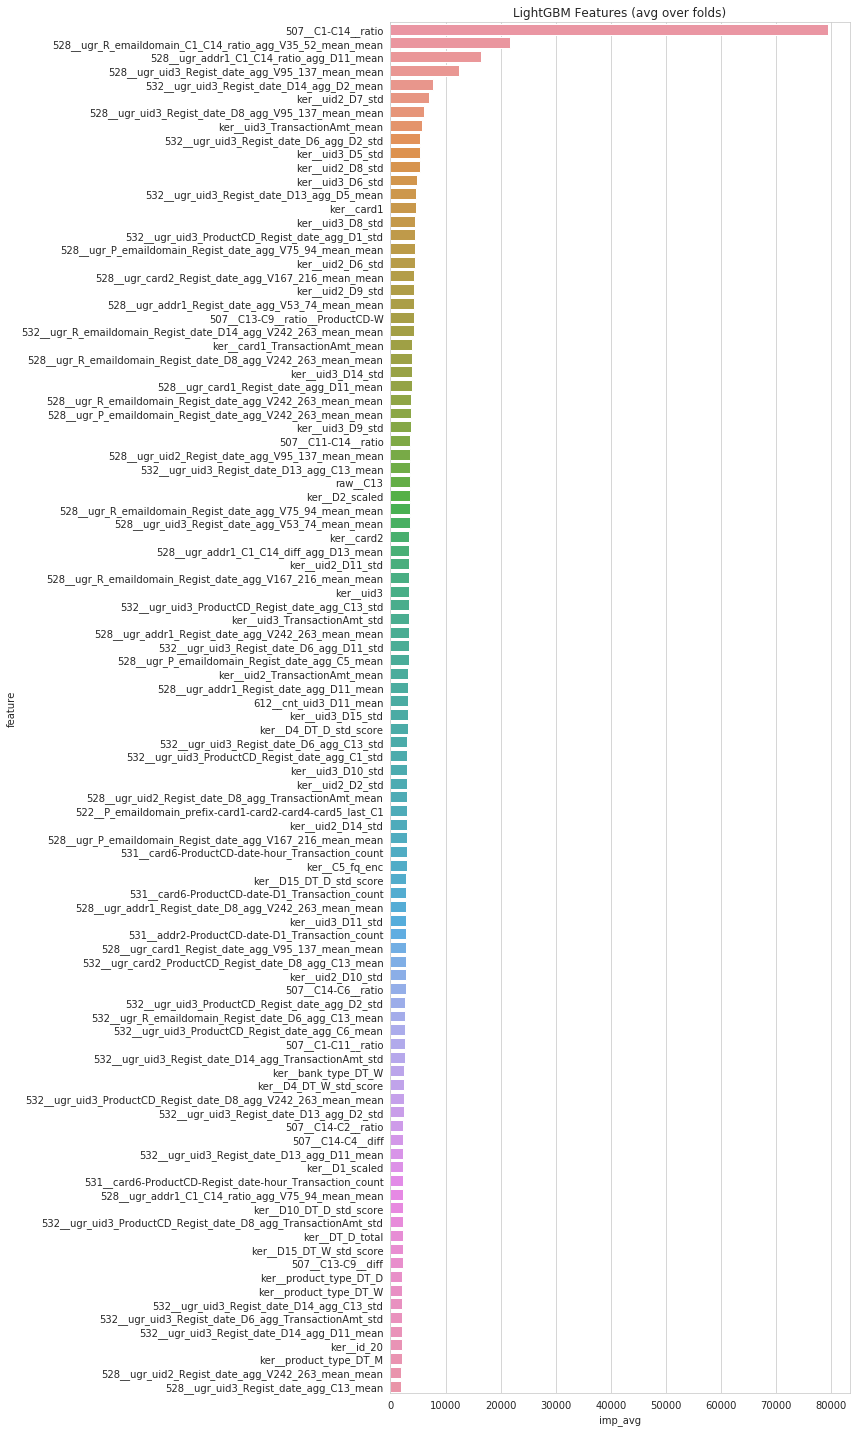

Setup Dataset dim_ml_dataset.


NameError: name 'list_result_feim' is not defined

In [4]:
is_submit = [True, False][0]
n_splits = 6
set_type = 'new_set'

valid_paths_train = paths_train_feature[:]
valid_paths_test  = paths_test_feature[:]

#========================================================================
# pathの存在チェック。なぜかたびたびFileNotFoundErrorが起きるので,,,
#========================================================================
remove_paths = []
for trn_path, tes_path in zip(valid_paths_train, valid_paths_test):
    if os.path.exists(trn_path) and os.path.exists(tes_path):
        pass
    else:
        remove_paths.append(trn_path)
        remove_paths.append(tes_path)
for path in remove_paths:
    if path.count('train'):
        valid_paths_train.remove(path)
        print(f'remove {path}')
    elif path.count('test'):
        valid_paths_test.remove(path)
        print(f'remove {path}')

if len(valid_paths_train):
    df_feat_train = parallel_load_data(valid_paths_train)
    df_feat_test  = parallel_load_data(valid_paths_test)
    
    col_drops = eval_check_feature(df_feat_train, df_feat_test)
    
    tmp_train = df_train.join(df_feat_train)
    tmp_test = df_test.join(df_feat_test)
else:
    tmp_train = df_train
    tmp_test = df_test

#========================================================================
# Train Test で片方に存在しないFeatureを除外
#========================================================================
diff_cols = list(set(tmp_train.columns) - set(tmp_test.columns))

for col in list(set(diff_cols)):
    from_dir = 'valid'
    to_dir = 'valid_trush'
    move_feature([col], from_dir, to_dir)
tmp_train.drop(diff_cols, axis=1, inplace=True)
print(f"  * Diff Features: {len(diff_cols)}")

# same_user_path = '../output/same_user_pattern/20190901_user_ids_share.csv'
# same_user_path = '../output/same_user_pattern/0902__same_user_id__card_addr_pemail_M.csv'

### DT-M
group_kfold_path = '../input/0908_ieee__DT-M_GroupKFold.gz'
group = read_pkl_gzip(group_kfold_path)
tmp_train[COLUMN_GROUP] = group

# tmp_train[COLUMN_GROUP] = tmp_train['528__ugr_uid3_Regist_date_agg_V95_137_mean_mean'].fillna(0)

#========================================================================
# Features elimination 
#==============================================================
# from scipy.stats import ks_2samp
# features_check = []
# columns_to_check = set(list(tmp_train)).difference(COLUMNS_IGNORE)
# for i in columns_to_check:
#     features_check.append(ks_2samp(tmp_test[i], tmp_train[i])[1])

# features_check = pd.Series(features_check, index=columns_to_check).sort_values() 
# features_discard = list(features_check[features_check==0].index)
# print(features_discard)
# tmp_train.drop(features_discard, axis=1, inplace=True)
# tmp_test.drop(features_discard, axis=1, inplace=True)


model_type = "lgb"
params = {
#     'n_jobs': 60,
    'n_jobs': 96,
#     'n_jobs': 84,
#     'n_jobs': 48,
#     'n_jobs': 36,
    'objective': 'binary',
    'num_leaves': 2**8-1,
    'max_depth': -1,
    'subsample': 0.7,
    'subsample_freq': 1,
    'colsample_bytree' : 0.50,
    'lambda_l1' : 0.1,
    'lambda_l2' : 1.0,
    'learning_rate' : 0.1,
    "early_stopping_rounds": 50,
    "seed": 1208,
    "bagging_seed": 1208,
    "feature_fraction_seed": 1208,
    "drop_seed": 1208,
    'n_splits': n_splits,
    'metric': 'auc',
    'model_type': model_type,
    'fold': ['stratified', 'group'][1],
}
if is_submit:
    params['learning_rate'] = 0.01
    params['learning_rate'] = 0.05
    params['learning_rate'] = 0.1
#     params["early_stopping_rounds"] = 100

logger.info(f"* EXP: dataset {set_type} {tmp_train.shape} lr {params['learning_rate']} ")

feim, test_preds = eval_train(
    logger,
    tmp_train,
    Y,
    tmp_test,
    COLUMN_GROUP,
    model_type,
    params,
    is_adv=[True, False][1],
    is_viz=[True, False][0],
)

In [ ]:
#========================================================================
# Bear's ID
#========================================================================
# data = pd.concat([df_train, df_test], axis=0)
col_bear = 'user_id_bear'
data.columns = [col.replace('ker__', '') for col in data.columns]

data.set_index(COLUMN_ID, inplace=True)
df_user_id_bear = pd.read_csv('../output/same_user_pattern/20190901_user_ids_share.csv').set_index(COLUMN_ID)
data[col_bear] = df_user_id_bear['predicted_user_id']

max_id = data[col_bear].max()

data.loc[data[data[col_bear].isnull()].index, col_bear] = np.arange(data[data[col_bear].isnull()].shape[0]) + max_id+1
data.reset_index(inplace=True)
data[col_bear] = data[col_bear].astype('int')
data[col_bear].head()

In [9]:
### Bear's fold0とfold3 oofの比較
good = test_preds[0]
bad = test_preds[3]

In [6]:
#========================================================================
# Bear's score
#========================================================================

from sklearn.metrics import roc_auc_score
col_bear = 'user_id_bear'
bear = pd.read_csv('../input/20190913_ieee__bear_probing.csv').iloc[:, [0, 1, 2, 3, 4, 6]]
# bear = bear[bear[COLUMN_TARGET]==-1]
bear = bear.iloc[:, [0,1,2,3,5]]
bear.columns = [COLUMN_ID, COLUMN_DT, col_bear, 'data_type', COLUMN_TARGET]
bear = bear.merge(data[[COLUMN_ID, 'DT-M']], how='inner', on=COLUMN_ID)
submission = pd.read_csv('../input/sample_submission.csv')
submission.columns = [COLUMN_ID, 'pred']


def bear_validation(test_pred):
    submission['pred'] = test_pred
    bear_score = submission.merge(bear, how='inner', on=COLUMN_ID)
    public  = bear_score[bear_score['data_type']=='test_public']
    private = bear_score[bear_score['data_type']=='test_private']
    
    public_score = roc_auc_score(public[COLUMN_TARGET].values, public['pred'].values)
    private_score = roc_auc_score(private[COLUMN_TARGET].values, private['pred'].values)
    all_score = roc_auc_score(bear_score[COLUMN_TARGET].values, bear_score['pred'].values)

    return public_score, private_score, all_score

NameError: name 'data' is not defined

In [9]:
public[COLUMN_DT].max()

'2018-08-10 5:31:05'

In [7]:
#========================================================================
# Bear's Public
#========================================================================

public  = bear[bear['data_type']=='test_public']

submission['good'] = good
submission['bad']  = bad
public = public.merge(submission, how='inner', on=COLUMN_ID)

public['diff_good'] = public['isFraud'] - public['good']
public['diff_bad'] = public['isFraud'] - public['bad']

NameError: name 'good' is not defined

In [98]:
print(
    roc_auc_score(public[COLUMN_TARGET].values, public['good'].values),
    roc_auc_score(public[COLUMN_TARGET].values, public['bad'].values)
)

# public.sort_values(by='diff_bad', ascending=False, inplace=True)

public['diff'] = public['good'] - public['bad']
tmp_pb = public[public[COLUMN_TARGET]==1]
tmp_pb.sort_values(by='diff', ascending=False, inplace=True)
tmp_pb[[COLUMN_ID, 'bear_id', 'data_type', 'isFraud', 'DT-M', 'good', 'bad', 'diff']].head(10)

0.9673884515214962 0.9058528584984199


,TransactionID,bear_id,data_type,isFraud,DT-M,good,bad,diff
61,3714268,140277,test_public,1.0,NaN,0.871406,0.001525,0.869881
60,3720667,140271,test_public,1.0,NaN,0.858287,0.041074,0.817213
59,3668549,140271,test_public,1.0,NaN,0.834983,0.038099,0.796884
66,3731050,145766,test_public,1.0,NaN,0.894409,0.207146,0.687263
62,3738980,140277,test_public,1.0,NaN,0.668444,0.001569,0.666875
3663,3734649,142155,test_public,1.0,NaN,0.781210,0.141223,0.639986
32,3744487,111050,test_public,1.0,NaN,0.589658,0.001391,0.588268
3674,3747470,223100,test_public,1.0,NaN,0.700843,0.122593,0.578250
33,3744762,111050,test_public,1.0,NaN,0.571607,0.001433,0.570174
13,3675467,40054,test_public,1.0,NaN,0.566149,0.005023,0.561126


In [95]:
# bear[bear['bear_id']==140277]
# bear[bear['bear_id']==140271]
# bear[bear['bear_id']==145766]

,TransactionID,bear_id,data_type,isFraud,DT-M
353,3423049,145766,train,NaN,2018-4
354,3460420,145766,train,NaN,2018-4
355,3467239,145766,train,NaN,2018-4
356,3499908,145766,train,NaN,2018-5
357,3541615,145766,train,NaN,2018-5
358,3702689,145766,test_public,1.0,NaN
359,3731050,145766,test_public,1.0,NaN
360,3767835,145766,test_private,1.0,NaN
361,3800432,145766,test_private,1.0,NaN
362,3836316,145766,test_private,1.0,NaN


In [102]:
feim.sort_values(by='imp_avg', ascending=False, inplace=True)
cols_ugr = [col for col in feim.index if col.count('ugr')]
# print(cols_ugr)
data[data[col_bear]==140271][cols_ugr]

,528__ugr_R_emaildomain_C1_C14_ratio_agg_V35_52_mean_mean,528__ugr_addr1_C1_C14_ratio_agg_D11_mean,528__ugr_uid3_Regist_date_agg_V95_137_mean_mean,532__ugr_uid3_Regist_date_D14_agg_D2_mean,528__ugr_uid3_Regist_date_D8_agg_V95_137_mean_mean,532__ugr_uid3_Regist_date_D6_agg_D2_std,532__ugr_uid3_Regist_date_D13_agg_D5_mean,532__ugr_uid3_ProductCD_Regist_date_agg_D1_std,528__ugr_P_emaildomain_Regist_date_agg_V75_94_mean_mean,528__ugr_card2_Regist_date_agg_V167_216_mean_mean,...,532__ugr_uid3_ProductCD_Regist_date_agg_TransactionAmt_mean,532__ugr_uid3_Regist_date_D6_agg_TransactionAmt_mean,528__ugr_uid3_Regist_date_agg_V242_263_mean_mean,532__ugr_uid3_Regist_date_D13_agg_V242_263_mean_mean,532__ugr_uid3_Regist_date_D6_agg_V242_263_mean_mean,532__ugr_uid3_Regist_date_D15_agg_V242_263_mean_mean,532__ugr_uid3_Regist_date_D14_agg_D11_std,532__ugr_uid3_ProductCD_Regist_date_agg_C4_mean,532__ugr_uid2_ProductCD_Regist_date_D8_agg_V242_263_mean_mean,532__ugr_uid3_Regist_date_D6_agg_C8_mean
481931,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
503568,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
519180,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
534879,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
549703,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
563204,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
583915,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
595540,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
647658,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0
700785,0.539019,219.139343,0.948542,133.043472,0.948542,81.5439,8.782609,84.248596,0.507424,NaN,...,86.033333,86.033333,NaN,NaN,NaN,NaN,93.404037,0.0,NaN,0.0


In [57]:
#========================================================================
# Join Prediction
#========================================================================
pred = read_pkl_gzip('../output/pred_result/20190925_1450__CV0-9581588018233685__all_preds.gz').iloc[:, 1].values
data['pred_holy'] = pred
oof_haku = pd.read_csv('../output/oof/oof.csv').iloc[:, 1].values
test_haku = pd.read_csv('../output/oof/submission.csv').iloc[:, 1].values
data['pred_haku'] = np.hstack((oof_haku, test_haku))

oof_hmd = pd.read_csv('../output/oof/20190925_hmdhmd_oof.csv').iloc[:, 1].values
test_hmd = pd.read_csv('../output/oof/20190925_hmdhmd_pred.csv').iloc[:, 1].values
data['pred_hmd'] = np.hstack((oof_hmd, test_hmd))

oof_bear = pd.read_csv('../output/oof/20190925_all_uid_agg_stats_lr001_oof_features1381_oof0.95_pub0.984_pri0.989.csv').iloc[:, 1].values
test_bear = pd.read_csv('../output/oof/20190925_all_uid_agg_stats_lr001_pred_features1381_oof0.95_pub0.984_pri0.989.csv').iloc[:, 1].values
data['pred_bear'] = np.hstack((oof_bear, test_bear))

In [58]:
#========================================================================
# 検証するbear's idでfilter
#========================================================================
data.sort_values(by=COLUMN_DT, inplace=True)
bear_first = data.groupby(col_bear)['DT-M'].first()
bear_cnt = data.groupby(col_bear)['DT-M'].count()

bear_test_user = bear_first[bear_first>='2018-7'].index
bear_multi_cnt_user = bear_cnt[bear_cnt>3].index
bear_valid_user = list(set(bear_test_user) & set(bear_multi_cnt_user))
print(len(bear_valid_user))

df_bear_valid = bear[bear[col_bear].isin(bear_valid_user)]
df_bear_valid = df_bear_valid.merge(data[[COLUMN_ID, 'pred_holy', 'pred_haku', 'pred_hmd', 'pred_bear']], how='inner', on=COLUMN_ID)

13180


In [51]:
pd.set_option('max_rows', 1400)
df_bear_valid.sort_values(by=[col_bear, COLUMN_DT], ascending=False)

,TransactionID,TransactionDT,user_id_bear,data_type,isFraud,DT-M,pred_holy,pred_haku,pred_hmd,pred_bear
190,3933554,2018-10-18 5:09:27,238973,test_private,0.0,2018-10,0.027210,0.020968,0.009294,0.000879
189,3915469,2018-10-11 10:07:44,238973,test_private,0.0,2018-10,0.019129,0.022850,0.016690,0.003033
188,3882529,2018-09-28 22:03:44,238973,test_private,0.0,2018-9,0.025446,0.018590,0.008547,0.000594
187,3860721,2018-09-19 15:39:37,238973,test_private,0.0,2018-9,0.018457,0.013923,0.007723,0.035967
186,3860719,2018-09-19 15:38:43,238973,test_private,0.0,2018-9,0.021479,0.015444,0.007262,0.037597
185,3844129,2018-09-12 16:31:15,238973,test_private,0.0,2018-9,0.028101,0.021953,0.009433,0.000312
184,3838344,2018-09-09 21:59:57,238973,test_private,0.0,2018-9,0.029251,0.023227,0.007123,0.000399
183,3805061,2018-08-27 19:30:09,238973,test_private,0.0,2018-8,0.019223,0.017302,0.006491,0.001300
182,3805056,2018-08-27 19:26:54,238973,test_private,0.0,2018-8,0.020172,0.017664,0.006688,0.000374
181,3805054,2018-08-27 19:26:09,238973,test_private,0.0,2018-8,0.022810,0.017498,0.006284,0.000804


In [63]:
cols_528 = pd.read_csv('../kernel/528_feature/528_78features_train.csv').columns

In [72]:
feim = read_pkl_gzip('../output/feature_importances/20190925_1450__CV0-9581588018233685__feature2114.gz')
feim.sort_values(by='imp_avg', ascending=False, inplace=True)
feim = feim.reset_index()
# cols_ugr = list(set([col for col in feim.index if col.count('ugr')]) - set(data.columns))
cols_ugr = [col for col in data.columns if col.count('ugr')]
feim = feim[feim['feature'].isin(cols_ugr)]
cols_check = [col for col in feim['feature'].values if col.count('ugr')]

cols_pred = sorted([col for col in data.columns if col.count('pred_')])

data[data[col_bear]==29157][[col_bear, COLUMN_TARGET] + cols_pred + cols_check]

,user_id_bear,isFraud,pred_bear,pred_haku,pred_hmd,pred_holy,528__ugr_R_emaildomain_C1_C14_ratio_agg_V35_52_mean_mean,528__ugr_addr1_C1_C14_ratio_agg_D11_mean,532__ugr_uid2_ProductCD_Regist_date_D8_agg_V242_263_mean_mean,528__ugr_addr1_C1_C14_ratio_agg_V75_94_mean_mean,...,532__ugr_uid3_Regist_date_D13_agg_C2_mean,532__ugr_uid3_ProductCD_Regist_date_D8_agg_D11_std,532__ugr_uid3_ProductCD_Regist_date_agg_C1_std,532__ugr_uid3_Regist_date_D6_agg_D11_std,528__ugr_uid3_Regist_date_agg_D11_mean,532__ugr_uid3_ProductCD_Regist_date_agg_D8_mean,532__ugr_uid3_Regist_date_D14_agg_C2_mean,532__ugr_uid3_ProductCD_Regist_date_D8_agg_C11_mean,532__ugr_uid3_Regist_date_D6_agg_C8_mean,532__ugr_uid3_ProductCD_Regist_date_agg_C4_mean
659609,29157,NaN,0.198661,0.983128,0.754798,0.980896,1.344813,82.800003,2.117647,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,19.500000,8.000000,6.085106,5.461538
659611,29157,NaN,0.196129,0.987625,0.827835,0.987158,1.344813,82.800003,2.117647,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,19.500000,8.000000,6.085106,5.461538
659628,29157,NaN,0.004611,0.986568,0.874375,0.994550,1.344813,82.800003,4.517647,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,9.000000,6.085106,5.461538
659629,29157,NaN,0.004582,0.991609,0.889157,0.995919,1.344813,82.800003,4.517647,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,9.000000,6.085106,5.461538
659631,29157,NaN,0.000554,0.991804,0.895823,0.996101,1.344813,82.800003,4.517647,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,9.000000,6.085106,5.461538
659635,29157,NaN,0.004588,0.991606,0.893338,0.996584,1.344813,82.800003,4.517647,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,9.000000,6.085106,5.461538
659637,29157,NaN,0.003720,0.991790,0.890907,0.996665,1.344813,82.800003,4.517647,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,9.000000,6.085106,5.461538
659644,29157,NaN,0.004685,0.976717,0.870928,0.995778,1.344813,82.800003,2.941176,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,12.076923,6.085106,5.461538
659660,29157,NaN,0.000184,0.984272,0.846095,0.995454,1.344813,82.800003,2.941176,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,12.076923,6.085106,5.461538
659663,29157,NaN,0.000748,0.991983,0.890853,0.996619,1.344813,82.800003,5.411765,1.235745,...,15.652174,NaN,8.379098,NaN,NaN,16.675213,15.034483,14.500000,6.085106,5.461538


In [79]:
tmp = data[data['528__ugr_R_emaildomain_C1_C14_ratio_agg_V35_52_mean_mean']>1.3][[col_bear, 'DT-M', COLUMN_TARGET] + cols_pred + cols_check]
tmp['DT-M'].value_counts()

2018-12    2102
2017-12    2094
2018-11    1543
2018-9     1531
2018-7     1524
2018-10    1470
2018-3     1469
2018-1     1405
2018-2     1404
2018-5     1343
2018-8     1263
2018-4     1046
Name: DT-M, dtype: int64

nan